# Working with large data set

In this workshop, we will use real data imported from csv file (boston.csv) instead of made-up ones

In [1]:
# import everything we need
import numpy as np
import pandas as pd

In [ ]:
''' 
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''

### Construct a dataframe for our data and target for a better illustration
### set the columns names according to the result above and show the first 5 rows

In [5]:
# Construct a dataframe for our data and target for a better illustration
# set the columns names according to the result above

df = pd.read_csv('boston.csv', index_col=0)

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


## Model Training

In [10]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [11]:
# notice that we need double square brackets to select X
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X = df[['RM']]  # Independent variable (features)
y = df['MEDV']   # Dependent variable (target)

print(" X:", X)
print("y:", y)

 X:         RM
0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
..     ...
501  6.593
502  6.120
503  6.976
504  6.794
505  6.030

[506 rows x 1 columns]
y: 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [12]:
#  We need 2D arrays for x_train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 404
Testing set size: 102


In [13]:
# instantiate a linear regression model
# train the model to fit the training data, finding the coef and intercept

reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Prediction

Now that we've trained our model, the next step is to predict the data.

Steps:

    Get predictions, 𝑦̂, using LinearRegression.predict()


In [15]:
y_pred = reg.predict(X_test) 


# Model Validation

We want to see how well our model fits the data. r2-score should be as close to 1 as possible

In [16]:
# we can see the coefficient and intercept our model finds
from sklearn.metrics import r2_score
print('r2_score: ',r2_score(y_test, y_pred)) 

r2_score:  0.3707569232254778


As the r2-score isn't very close to 1, our linear regression model doesn't really fit the data well
We can visualize it to see what the model looks like

In [19]:
import matplotlib.pyplot as plt


Plot the regression line (blue) vs the actual value (red)

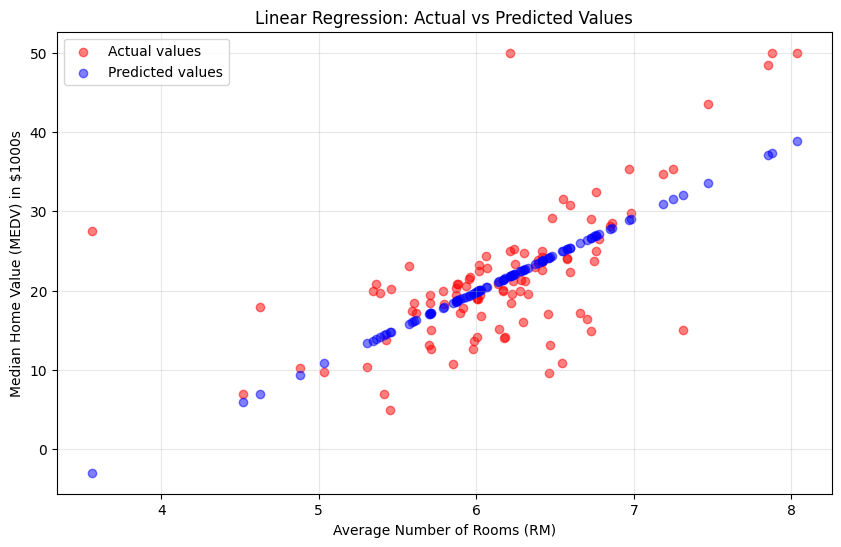

In [20]:
# We want to plot the regression line(blue) vs the actual value(red)


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Actual values')
plt.scatter(X_test, y_pred, color='blue', alpha=0.5, label='Predicted values')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Home Value (MEDV) in $1000s')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()